In [26]:
!pip install matplotlib

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('./test.csv').drop([i for i in range(91)]).reset_index(drop=True)
CSV = './{}.TW.csv'.format(2330)

daily_trade =pd.read_csv('{}'.format(CSV)).drop(['Dividends','Stock Splits'],axis = 1).drop([i for i in range(92)]).reset_index(drop=True)
res = pd.concat([df,daily_trade],axis=1).drop([0]).drop(['Unnamed: 0','MA_1'],axis = 1).set_index(['Date'])


# 定義新變數
res['KD'] = res['K_values'] - res['D_values']
# ---------------------------------------------------------------------------------- #
rolling_time = 10
res = res.reset_index(drop=True)
res = res[::-1]
res['result'] = res['Close'] - res['Close'].rolling(window = rolling_time).mean()
X = [i for i in range(len(res))]
X[-(rolling_time - 1):]
res = res.drop(X[-(rolling_time - 1):])

# 定義漲跌
L = []
for value in res['result'].values:
    if value > 0:
        L.append(1)
    else:
        L.append(0)


        
        

res['test'] = res['MACD_10'] - res['MACD_20']
res = res.drop(['MACD_10','MACD_20'],axis = 1)
       
res = res.drop(['result'],axis = 1)



# 調整變數
res = res.drop(['MACD_9','MACD_5','MACD_60','D_values','K_values','KD','RSV_9','Mean_Volume_15'],axis = 1)
# res = res.drop(['Volume','Open','High','Low','Close','D_values','K_values','MACD_9'],axis = 1)

In [36]:
X = res.values
y = np.array(L)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) #測試資料比例

rfc=RandomForestClassifier(n_estimators = 800,n_jobs = -1,random_state =50, min_samples_leaf = 50)
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [37]:
y_predict=rfc.predict(X_test)
# y_predict
rfc.score(X_test,y_test)

0.6148409893992933

In [38]:
imp=rfc.feature_importances_
imp

array([0.1402407 , 0.19317128, 0.15393937, 0.16037515, 0.11911148,
       0.23316202])

In [39]:
names=[i for i in res.columns]
names

['Open', 'High', 'Low', 'Close', 'Volume', 'test']

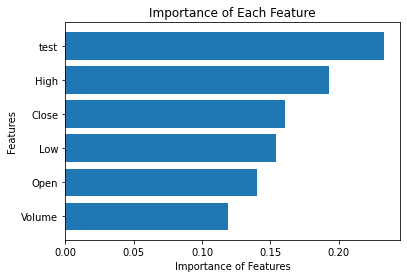

In [40]:
zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()